### Modelos AR , MA y ARIMA 

Creado por : __Adolfo Huerta__

In [12]:
import pandas as pd

In [13]:
datos = [[1996,	44],[1997,	50],[1998,	55],[1999,	40],[2000,	32],[2001,	34],[2002,	60],[2003,	63],[2004,	64],[2005,	78],[2006,	80],[2007,	88],[2008,	40],[2009,	68],[2010,	63],[2011,	69],[2012,	72],[2013,	75],[2014,	71],[2015,	73],[2016,	63],[2017,	67],[2018,	68]]
# pasar datos a un dataframe
df = pd.DataFrame(datos, columns=['Año', 'Precio abono'])
df

,Año,Precio abono
0,1996,44
1,1997,50
2,1998,55
3,1999,40
4,2000,32
5,2001,34
6,2002,60
7,2003,63
8,2004,64
9,2005,78


<AxesSubplot: title={'center': 'Precio abono'}, xlabel='Año'>

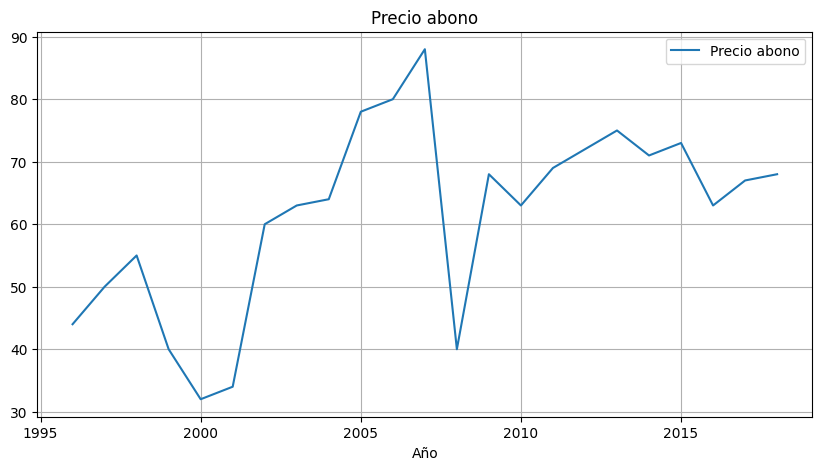

In [14]:
# graficar los datos como una serie de tiempo
df.plot(x='Año', y='Precio abono', figsize=(10,5), grid=True, title='Precio abono')


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

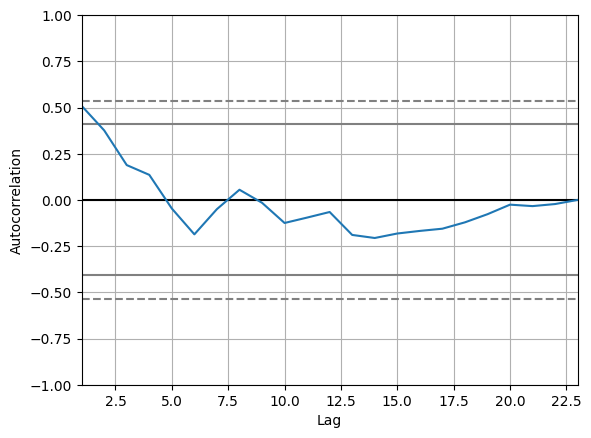

In [15]:
#crear un correlograma para ver si los datos son estacionarios
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Precio abono'])


/opt/homebrew/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


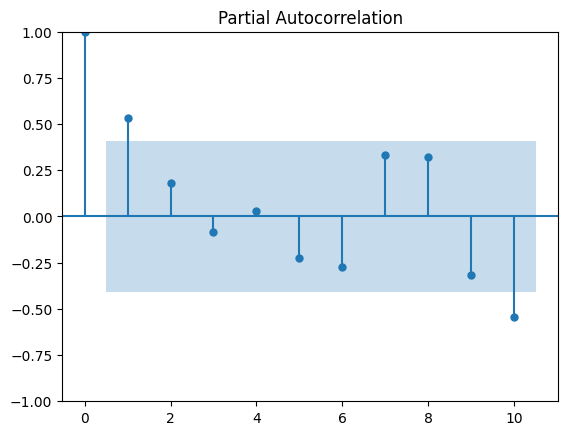

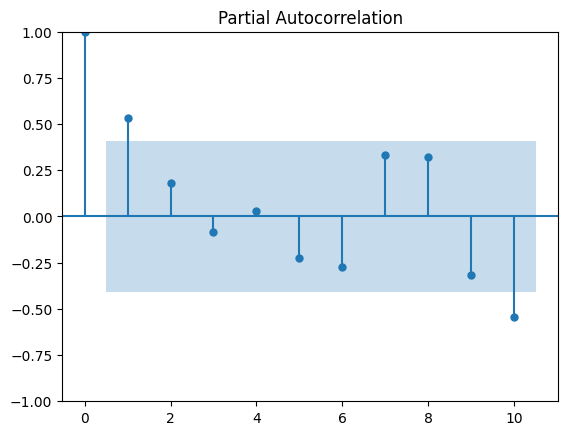

In [16]:
#crear un correlograma parcial para ver si los datos son estacionarios
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Precio abono'], lags=10)


Depende de varios factores el como se general el analisis , en este caso va a ser necesario unicamente un AR(1)

$ Y(t) = c + φ * Y(t-1) + ε(t) $

Donde:

- Y(t) es el valor de la variable en el tiempo t.
- c es una constante o intercepto.
- φ es el coeficiente de autorregresión que indica la dependencia lineal entre el valor actual Y(t) y el valor anterior Y(t-1). Representa la contribución de Y(t-1) en la predicción de Y(t).
- ε(t) es un término de error aleatorio con media cero y varianza constante. Representa el ruido o la parte no explicada por el modelo autorregresivo.
<br>
En resumen, un modelo AR(1) estima el valor actual de una variable en función de su valor anterior, multiplicado por un coeficiente φ, más un término de error aleatorio. 
<br>
El coeficiente φ determina la fuerza y dirección de la dependencia entre los valores consecutivos de la serie de tiempo. Si φ es positivo, indica una correlación positiva, mientras que si es negativo, indica una correlación negativa.
<br>
Es importante destacar que el modelo AR(1) es un caso específico de los modelos autorregresivos de orden superior (AR(p)), donde p representa el número de retardos utilizados en el modelo. Cada modelo AR(p) tiene su propia fórmula y parámetros correspondientes.

Parametro del modelo

In [20]:
def pronostico_AR(valor, constante, coeficiente_AR):
    return constante + coeficiente_AR * valor

#Generar promedio de los datos en una variable
constante = df['Precio abono'].mean()
coeficiente_AR = 0.5


In [28]:
#pasar los datos a una lista
datos = df['Precio abono'].iloc[1:].tolist()
AR1 = []
for x in datos:
    AR1.append(pronostico_AR(x, constante, coeficiente_AR))
print(AR1)

[86.6086956521739, 89.1086956521739, 81.6086956521739, 77.6086956521739, 78.6086956521739, 91.6086956521739, 93.1086956521739, 93.6086956521739, 100.6086956521739, 101.6086956521739, 105.6086956521739, 81.6086956521739, 95.6086956521739, 93.1086956521739, 96.1086956521739, 97.6086956521739, 99.1086956521739, 97.1086956521739, 98.1086956521739, 93.1086956521739, 95.1086956521739, 95.6086956521739]


Calcular el valor medio estimado

In [34]:
#generar el valor medio promedio de datos menos AR1
for x in range(0, len(datos)):
    print(datos[x]- AR1[x])
    

-36.60869565217391
-34.10869565217391
-41.60869565217391
-45.60869565217391
-44.60869565217391
-31.608695652173907
-30.108695652173907
-29.608695652173907
-22.608695652173907
-21.608695652173907
-17.608695652173907
-41.60869565217391
-27.608695652173907
-30.108695652173907
-27.108695652173907
-25.608695652173907
-24.108695652173907
-26.108695652173907
-25.108695652173907
-30.108695652173907
-28.108695652173907
-27.608695652173907
